# Interactive Visualization with Plotly


## Introduction

Data visualization has become one of the most impactful ways to convey findings to readers. It manipulates complex pool of data to visually present the data's patterns, trends, and correlations in a meaningful way.

Interactive visualization as a branch of graphic visualization allows users to interact with graphic illustrations of information. By enabling the exploration of data via manipulation of chart size, shape and motion of visual objects, it breaks the dimensional limitation of traditional visualization. 

The blooming of web technologies allows us to see a more interactive visualization. Famous Javascript Library [D3.js](https://d3js.org/) is widely used to build powerful interactive visualization component on the webpage. Today, I am going to introduce an interactive visualization tool that helps to create interactive graphs inside IPython notebook.

## Plotly API Libraries

Plotly API Libraries allow you to add D3.js charts and maps for other data focused environment, Python, MATLAB, R. In this tutorial, we will focus on Plotly Library for Python and showcase how it can work along with other Python libraries for data science.
 
### Getting started with Plotly for Python
#### Installation
Plotly is not included in the standard Anaconda package. To install, use the package manager pip or conda

<pre><code>$ pip install plotly</code></pre>

or

<pre><code>$ conda install -c plotly</code></pre>

#### Configuration
Plotly offers a web-service for hosting graphs, you can get a [free account](https://plot.ly/accounts/login/?action=signup) to start.  
To start public hosting, you will need set your credentials first:

```python
import plotly 
plotly.tools.set_credentials_file(username='username', api_key='apikey')
```
Both '**username**' and '**apikey**' need to be replaced with your Ploty username and API key.  

Although Plotly is known for its graph hosting service, we can still access its plotting capabilities from an IPython notebook. For the purpose of this tutorial, we will focus on its offline feature.  

To plot the graphs offline inside a Jupyter Notebook Environment, you will need to initiate the Plotly Notebook offline mode as below:

In [1]:
from plotly.offline import *
init_notebook_mode(connected=True) # run at the start of every notebook

# Create random data with numpy
import numpy as np

# All plotly graph objects
import plotly.graph_objs as go

### Basic Charts
Plotly Libray offers a variety of basic charts. Unlike static charts generated by matplotlib, the basic charts Plotly generated allow user interaction. When it comes to a dense graph, a combination of box select and zoom in can be extremely helpful. Hovering the chart will enable zoom in/out and display data points, which makes the charts with numerous data points as neat as possible. All these interactivity features come by default, no extra configuration needed.

#### Bar Chart

In [2]:
data = [go.Bar(
            x=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
            y=np.random.rand(12)
    )]
iplot(data)

#### Histograms

In [3]:
data = [
    go.Histogram(
        x=np.random.randn(500)
    )
]
iplot(data)

#### Scatter Plot

In [4]:
N = 200
random_y = np.random.randn(N)

# Create a data set
data = [go.Scatter(
    y = random_y,
    mode='markers',
    marker=dict(
        size='16',
        color = np.random.randn(N), #set color equal to a variable,
        colorscale='Viridis',
        showscale=True
    )
)]

iplot(data)

#### Line Plot

In [5]:
x = np.linspace(0,10,100)
y = np.cumsum(0.01*np.random.randn(100))

data = [
    go.Scatter(
        x=x,
        y=y
    )
]
## Use layout to configure the xaxis label and yaxis label
layout = go.Layout(
    xaxis=dict(
        title='Time'
    ),
    yaxis=dict(
        title='Value'
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)


Above basic 2D examples are pretty self-explanatory, similar to matplotlib, Plotly provides APIs for generating basic charts in a few lines of code. Line charts and scatter charts both use <code>Scatter</code> class, but with a different mode, <code>mode='markers'</code> shows each data point as a discrete one. Bar chart and Histogram have their own plot objects. Typically, each plot object represents one particular type of charts. 

Besides, the three plot objects I covered in the above examples. Plotly has <code>go.Box()</code>, <code>go.Area()</code>, <code>go.Contour()</code>, <code>go.Heatmap()</code>, <code>go.Pie()</code> and so on, covering all major 2D visualization types.


For a plotly chart, there are three core components:
* Data
* Layout
* Figure

<code>Data</code> is actually a list object in Python, it contains all the traces we want to plot. Trace is a collection od data and the specifications of which we want the data plotted, which is an object itself, returned by <code>plotly graph_objs</code> APIs. In the above line plot example, a trace is returned by <code>go.Scatter()</code>.

<code>Layout</code> object is used to style the chart, namely define the look of the plot. This component is unrelated to the data. We can change things like the title, axis titles, spacing and font of our plot. We need to construct a python dictionary as the layout configuration, which may result in longer code. This generic function allows users to avoid cubmersome style APIs such as matplotlib provides, resulting in a steeper learning curve.

Finally, <code>Figure</code> object just create the final object to be plotted. It simply creates a dictionary-like object that contains both the data object and the layout object.

### Advanced Features
For 1-Dimensional and 2-Dimensional data, the advantage of an interactive plot is not yet obvious. Matplotlib can generate figures that meet the requirement although special tuning may need for a nicer style. However, as our dataset gets complex, the benefits bring by user interactions start to reveal. 

#### 3D Charts
When we generate a 3-Dimensional chart using matplotlib, an Axes3D object is created. Under the hood, the 3D chart generated by matplotlib is rendered on a canvas node. Even though it does provide native support for functionalities such as zoom in and rotation, it often leads to an unresponsive browser.

Plotly, on the contrary, provides a far more smooth 3D plotting experience. All the graphs and plots which Plotly generates are actually the product of javascript library plotly.js.  Thanks to this and D#.js and stack.gl powered engine, plotly's 3D chart is fully optimized on webpage and IPython notebook.

In [6]:
x = np.random.randn(1000)
y = 0.4*x**2 + x + 0.7*np.random.randn(1000)
z = 0.5 + 0.2*(y-1)**2 + 0.1*np.random.randn(1000)

trace = go.Scatter3d(
    x=x, y=y, z=z,
    mode='markers',
    marker=dict(
        size=4,
        color=z,
        colorscale='Viridis',
    )
)

layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene=dict(
        xaxis=dict(
            title='Value1',
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230, 230)'
        ),
        yaxis=dict(
            title='Value2',
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230, 230)'
        ),
        zaxis=dict(
            title='Value3',
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230, 230)'
        )
    ),
    showlegend=False,
)
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

Here, I purposely use the same dataset from Professor's matplotlib example to showcase the performance of Plotly 3D chart rendering. Rotating and zooming a Plotly 3D chart is extremely smooth comparing with matlibplot 3D chart. 

#### WebGL vs. SVG in Plotly
By default, Plotly generate plots with SVG. Essentially, each graphic object becomes part of DOM with SVG. Therefore, plotting with SVG scales reciprocally with the number of objects to be drawn. This becomes an issue due to browser limitations, once the number of data points exceed 500,000 for lines charts or 40,000 for other types of charts, the Plotly SVG plotting becomes difficult. Alternatively, for data at this scale, we can use plotty image API or matplotlib. But both returns a static image instead of a graphic, therefore, we lose interactivity.

Plotly provides another option. Besides SVG graph, Plotly has the option to generate WebGL graph for increased Speed, improved interactivity, and the ability to plot more data. 



In [7]:
N = 50000
data = [go.Scattergl(
    x = np.random.randn(N),
    y = np.random.randn(N),
    mode='markers',
    marker=dict(
        color = np.random.randn(N),
        colorscale='Viridis',
        showscale=True
    )
)]

iplot(data)

The example above renders 50,000 data points with WebGL. <code>Scattergl</code> is used here to generate the plot with WebGL, instead of SVG plot generated by <code>Scatter</code> function.   
However, even though plotly is capable of rendering such a massive visualization. When you need to generate such a massive plot, you should probably think whether is it necessary to plot the entire dataset, is data compression or reduction possible. After all, the purpose of visualization is to help readers understand data, not to overwhelm them with data.

#### Matplotlib Migration Support

```python
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(x,y,z, '.')
ax.set_xlabel("Value 1")
ax.set_ylabel("Value 2")
ax.set_zlabel("Value 3")
```

By comparing the code snippet, we can see Plotly does require more configuration to get the basic layout and style.

Matplotlib is the first generation of the python visualization libraries, if you are working with legacy visualization codebase, it is highly likely done by matplotlib.  
Given that matplotlib does not support interactivity with data, how can we incorporate Plotly's interactivity features, do we have to rewrite the entire logic in Ploty style? 

The answer is no. Plotly provides native support on matplotlib. To illustrate how Plotly can provide matplotlib some level of interactivity, I will first create a normal distribution using matplotlib.

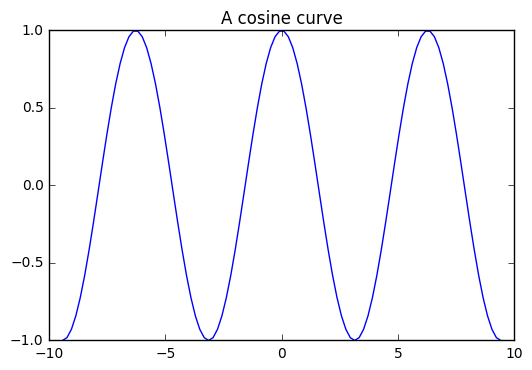

In [8]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import math

## Generating the data..
mu = 0
variance = np.pi
sigma = math.sqrt(variance)
x = np.linspace(-3*np.pi, 3*np.pi, 100)
cosx = np.cos(x)

mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
ax.plot(x, cosx)
ax.set_title('A cosine curve')

Plolty's <code>mpl_to_plotly</code> function from <code>tools</code> module converts a matplotlib figure into a plotly figure. A plotly figure is actually just a dictionary-like object, therefore we can retrieve and modify the layout setting. Furthermore, as the chart is entirely in plotly, we can even add new dataset in plotly fashion. 

In [9]:
import plotly.tools as tls
plotly_fig = tls.mpl_to_plotly(mpl_fig)

## Retrieve layout setting
plotly_fig['layout']

## Change the chart title 
plotly_fig['layout']['title'] = 'A sine and cosine curve in Plotly'

## Add extra data sine curve
sinx = np.sin(x)
plotly_fig['data'].append( dict(x=x, y=sinx, type='scatter', mode='lines') )

## Generate new figure
iplot(plotly_fig)

## Comparison: Plotly vs. Matplotlib

|                       |                          Plotly                         |                 Matplotlib                |
|:---------------------:|:-------------------------------------------------------:|:-----------------------------------------:|
|    Platform support   |        Supports Python, R, Matlab and Javascript        |           Only works for Python           |
| Interactivity support |            Generates most interactive graphs            |       Limited interactivity with data       |
| Graph hosting service |                        Available                        |               Not available               |
|      Code length      |     Need set up layout configuration for basic style    |   Default plot styles with built-in code  |
|     Graph styling     |                 Straightforward to style                | Need big effort to get reasonable looking |
|       Community       |                        Fairly new                       |          Large community support          |
|   Libraries support   |             Works well with major libraries             |               Widely support              |
|      Easy to use      |                     Easy to pick up                     |        Power comes with complexity        |
|      Data import      | Support major DBMS such as MySQL, PostgreSQL and Oracle |               Rely on Pandas              |

Matplotlib is the grandfather of Python data visualization libraries. Being over a decade old, it’s the most widely used library for plotting in the Python community, there are almost twenty thousand matplotlib tagged questions on Stackoverflow. Many other libraries are built on  top of matplotlib or designed to work with it. Therefore, it allows users to plot data from very few lines of code.

While matplotlib is quite good for getting a sense of the data, it has long been criticized for its default styles for years. It’s not very useful for generating reasonable-looking charts in a timely easy manner. 
As Chris Moffitt points out in his overview of Python visualization tools, matplotlib ”is extremely powerful but with that power comes complexity.”

Plotly, on the other hand, as a newly developed platform for data visualization, comes with a set of nicely configured default styles. Its forte is to make interactive plots, which is exactly what matplotlib is missing. While matplotlib can be sufficient for 2D basic plotting such as bar chart, pie chart, line plot and scatter plots, plotly can really show its strength for charts such as contour plots, dendograms, and 3D charts.

To conclude, use matplotlib when you simply want to get a sense of the data set, and try plotly when you want to make graphs with fancy styles that come with powerful user interaction features.

## Further study

Plotly has a very complete documentation, with extremely accessible tutorials. If you are interested in this library, make sure to check out [more robust exmaples](https://plot.ly/python/) on their site.

## References

1.  "Offline Plots in Plotly in Python" [Online]. Available:  
https://plot.ly/python/offline/
2.  "IPython Notebook Gallery" [Online]. Available:  
https://plot.ly/ipython-notebooks/gallery/
3.  "10 Useful Python Data Visualization Libraries for Any Discipline" [Online]. Available:  
https://blog.modeanalytics.com/python-data-visualization-libraries/
4.  "Five libraries in Python for data scientists: how to display information" [Online]. Available:  
https://bbvaopen4u.com/en/actualidad/five-libraries-python-data-scientists-how-display-information
